<a href="https://colab.research.google.com/github/Prithviraj2706/DataScience-Assignment/blob/main/Decision_Tree_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
data=pd.read_csv('/content/Fraud_check.csv')

EDA

In [ ]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


EDA

In [ ]:
data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [ ]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Length: 600, dtype: bool

In [ ]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
data['Undergrad'].unique()

array(['NO', 'YES'], dtype=object)

In [ ]:
data['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [ ]:
data['Urban'].unique()

array(['YES', 'NO'], dtype=object)

Data Preprocessing

In [ ]:
#converting datatype to category
data[['Undergrad','Marital.Status','Urban']]=data[['Undergrad','Marital.Status','Urban']].astype('category')

In [ ]:
#Label Encoding
data['Undergrad']=data['Undergrad'].cat.codes
data['Marital.Status']=data['Marital.Status'].cat.codes
data['Urban']=data['Urban'].cat.codes

In [ ]:
#classifying numerical data accordingly
data['Tax.Inc'] = pd.cut(data['Taxable.Income'], bins=[-float('inf'), 30000, float('inf')], labels=['Risky', 'Good'])
data['Tax.Inc']

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Tax.Inc, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [ ]:
#dropping the previous unnecessary column
data=data.drop('Taxable.Income',axis=1)
data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax.Inc
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good
...,...,...,...,...,...,...
595,1,0,39492,7,1,Good
596,1,0,55369,2,1,Good
597,0,0,154058,0,1,Good
598,1,1,180083,17,0,Good


Visualisation

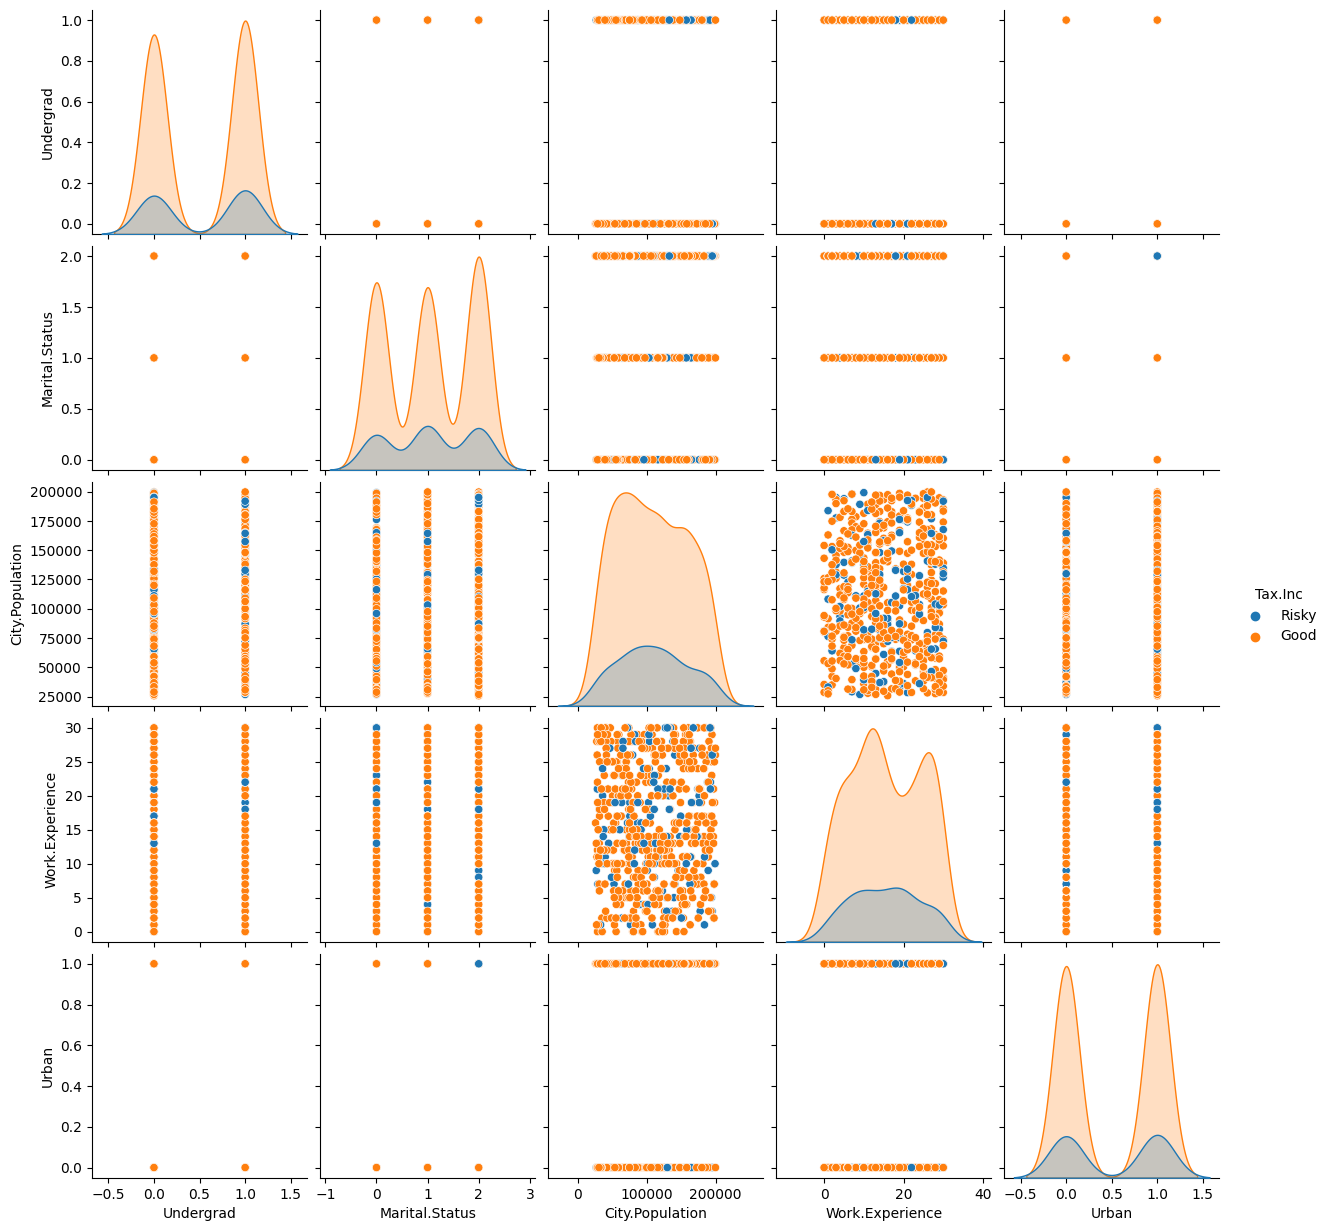

In [ ]:
import seaborn as sns
sns.pairplot(data=data, hue = 'Tax.Inc')

In [ ]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
# Normalized data frame (considering the numerical part of data)
data_norm = norm_func(data.iloc[:,0:5])
data_norm.tail(10)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
590,0.0,0.5,0.341473,0.466667,1.0
591,1.0,1.0,0.615406,0.600000,1.0
592,1.0,1.0,0.283703,0.533333,0.0
593,0.0,0.0,0.610256,0.333333,1.0
594,0.0,0.5,0.412341,0.300000,1.0
595,1.0,0.0,0.078811,0.233333,1.0
596,1.0,0.0,0.170058,0.066667,1.0
597,0.0,0.0,0.737240,0.000000,1.0
598,1.0,0.5,0.886810,0.566667,0.0
599,0.0,0.0,0.760683,0.533333,0.0


In [ ]:
X=data_norm
Y=data.iloc[:,-1]

Model Building using Entropy criteria

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)
treemodel=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)

In [ ]:
treemodel.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.4230769230769231, 0.875, 'x[2] <= 0.198\nentropy = 0.735\nsamples = 402\nvalue = [319, 83]'),
 Text(0.15384615384615385, 0.625, 'x[3] <= 0.217\nentropy = 0.611\nsamples = 93\nvalue = [79, 14]'),
 Text(0.07692307692307693, 0.375, 'entropy = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.23076923076923078, 0.375, 'x[3] <= 0.817\nentropy = 0.679\nsamples = 78\nvalue = [64, 14]'),
 Text(0.15384615384615385, 0.125, 'entropy = 0.796\nsamples = 54\nvalue = [41, 13]'),
 Text(0.3076923076923077, 0.125, 'entropy = 0.25\nsamples = 24\nvalue = [23, 1]'),
 Text(0.6923076923076923, 0.625, 'x[2] <= 0.223\nentropy = 0.766\nsamples = 309\nvalue = [240, 69]'),
 Text(0.5384615384615384, 0.375, 'x[2] <= 0.217\nentropy = 0.954\nsamples = 8\nvalue = [3, 5]'),
 Text(0.46153846153846156, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.6153846153846154, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8461538461538461, 0.375, 'x[1] <= 0.25\nentropy = 0.746\nsamples = 301\nva

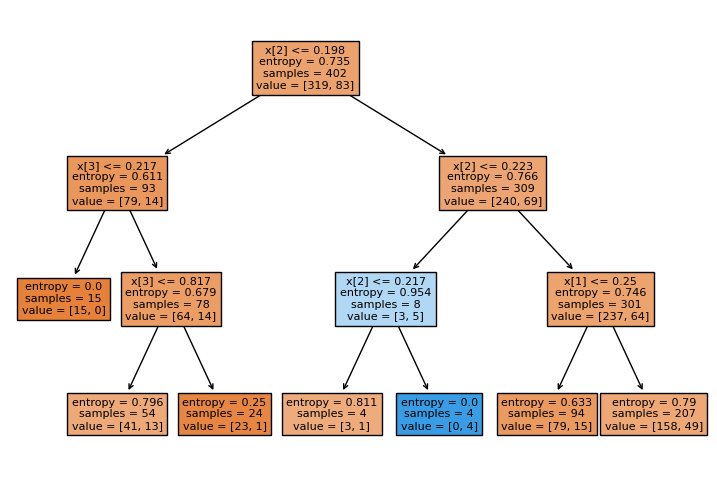

In [ ]:

#Decision Tree
from sklearn import tree
plt.figure(figsize=(9,6))
tree.plot_tree(treemodel,filled=True)


In [ ]:
Y_pred=treemodel.predict(X_test)
Y_pred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [ ]:
score=accuracy_score(Y_test,Y_pred)
print("Accuracy score is",np.round(score*100,2),"%")

Accuracy score is 78.79 %


In [ ]:
print(classification_report(Y_pred,Y_test))

              precision    recall  f1-score   support

        Good       0.99      0.79      0.88       197
       Risky       0.00      0.00      0.00         1

    accuracy                           0.79       198
   macro avg       0.50      0.40      0.44       198
weighted avg       0.99      0.79      0.88       198



Model Building using Gini criteria

In [ ]:
treemodel2=DecisionTreeClassifier(criterion='gini',max_depth=3)


In [ ]:
treemodel2.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'x[2] <= 0.198\ngini = 0.328\nsamples = 402\nvalue = [319, 83]'),
 Text(0.25, 0.625, 'x[0] <= 0.5\ngini = 0.256\nsamples = 93\nvalue = [79, 14]'),
 Text(0.125, 0.375, 'x[1] <= 0.75\ngini = 0.153\nsamples = 48\nvalue = [44, 4]'),
 Text(0.0625, 0.125, 'gini = 0.213\nsamples = 33\nvalue = [29, 4]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.375, 0.375, 'x[2] <= 0.011\ngini = 0.346\nsamples = 45\nvalue = [35, 10]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4375, 0.125, 'gini = 0.325\nsamples = 44\nvalue = [35, 9]'),
 Text(0.75, 0.625, 'x[2] <= 0.223\ngini = 0.347\nsamples = 309\nvalue = [240, 69]'),
 Text(0.625, 0.375, 'x[2] <= 0.217\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.5625, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.875, 0.375, 'x[1] <= 0.25\ngini = 0.335\nsamples = 301\nvalue = [237, 64]'),
 Text(0.8125, 0.

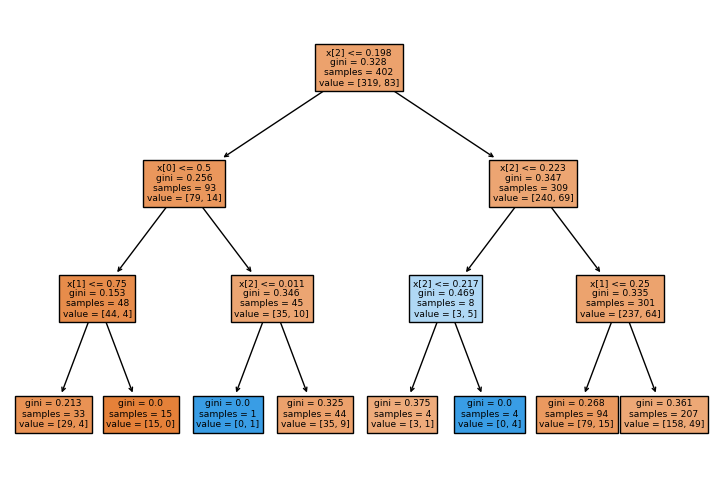

In [ ]:
#Decision Tree
from sklearn import tree
plt.figure(figsize=(9,6))
tree.plot_tree(treemodel2,filled=True)

In [ ]:
Y_pred2=treemodel2.predict(X_test)
Y_pred2

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [ ]:
score=accuracy_score(Y_pred2,Y_test)
print("Accuracy score is",np.round(score*100),"%")   #Gini criterian gives more accuracy

Accuracy score is 79.0 %


In [ ]:
print(classification_report(Y_pred2,Y_test))

              precision    recall  f1-score   support

        Good       0.99      0.79      0.88       197
       Risky       0.00      0.00      0.00         1

    accuracy                           0.79       198
   macro avg       0.50      0.40      0.44       198
weighted avg       0.99      0.79      0.88       198

